<a href="https://colab.research.google.com/github/Vannod/SistemasFyC/blob/P2_Sistemas/Tarea_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis bursátil
Realizar un programa en Python o R que consultando una base de datos (la
que usted prefiera) calcule y grafique el RSI de un menú de acciones.

## Librerías

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Acciones
* Kohl's Corporation (KSS)
* Best Buy (BBY)
* General Motors Company (GM)


Seleccione una acción:
1. KSS
2. BBY
3. GM
0. Salir
Ingrese el número correspondiente a la acción: 3


[*********************100%***********************]  1 of 1 completed



Últimos valores para GM:
Price                          Close         RSI
Ticker                            GM            
Date                                            
2024-10-25 00:00:00+00:00  52.070000  630.965554
2024-10-28 00:00:00+00:00  52.730000  319.332334
2024-10-29 00:00:00+00:00  51.540001  631.670826
2024-10-30 00:00:00+00:00  51.970001  322.596684
2024-10-31 00:00:00+00:00  50.759998  632.090059


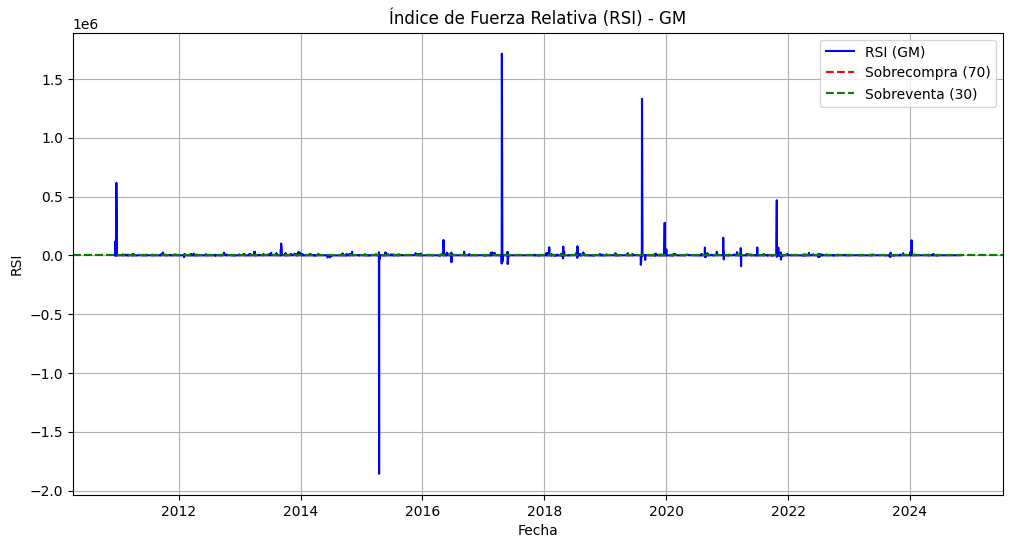


Seleccione una acción:
1. KSS
2. BBY
3. GM
0. Salir
Ingrese el número correspondiente a la acción: 0


In [6]:
acciones = ['KSS', 'BBY', 'GM']

data_source = 'yahoo'
start_date = '2000-01-01'
end_date = '2024-11-01'

def RSI(df, window_c):
   delta = df.diff(1)
   gain = df.where(delta > 0, 0)
   loss = -df.where(delta < 0, 0)

   avg_gain = gain.rolling(window=window_c).mean()
   avg_loss = loss.rolling(window=window_c).mean()

   rs = avg_gain / avg_loss
   rsi = 100 - (100 / (1 + rs))

   return rsi

def indicadores(symbol, start_date, end_date, window_c):

    df = yf.download(symbol, start=start_date, end=end_date)
    df['RSI'] = RSI(df['Close'], window_c)

    return df

def graficar_rsi(df, symbol):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['RSI'], label=f"RSI ({symbol})", color='blue')
    plt.axhline(70, color='red', linestyle='--', label='Sobrecompra (70)')
    plt.axhline(30, color='green', linestyle='--', label='Sobreventa (30)')
    plt.title(f"Índice de Fuerza Relativa (RSI) - {symbol}")
    plt.xlabel("Fecha")
    plt.ylabel("RSI")
    plt.legend()
    plt.grid()
    plt.show()

while True:
    print("\nSeleccione una acción:")
    for i, accion in enumerate(acciones):
        print(f"{i + 1}. {accion}")
    print("0. Salir")

    opcion = input("Ingrese el número correspondiente a la acción: ")
    if opcion == '0':
        break

    try:
        opcion = int(opcion)
        if 1 <= opcion <= len(acciones):
            symbol = acciones[opcion - 1]
            df = indicadores(symbol, start_date, end_date, window_c=20)

            print(f"\nÚltimos valores para {symbol}:")
            print(df[['Close','RSI']].tail())

            # Graficar indicadores
            graficar_rsi(df, symbol)
        else:
            print("Por favor, seleccione otra opción válida.")
    except ValueError:
        print("Ingrese un número.")
